In [147]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

In [143]:
def lambda_swap(alpha, beta_):
    return 0.5*(1 + np.sqrt(1 - 16*alpha*(1-alpha)*beta_*(1-beta_)))

def P(lambda_, delta):
    return 2*(2*(1 - lambda_))**(1/delta - 1)/delta

def gen_lambda(delta):
    if delta <= 0:
        raise ValueError("delta must be positive")
    
    return float(f"{scipy.stats.beta.rvs(1, 1/delta, scale=0.5, loc=0.5):.2f}")

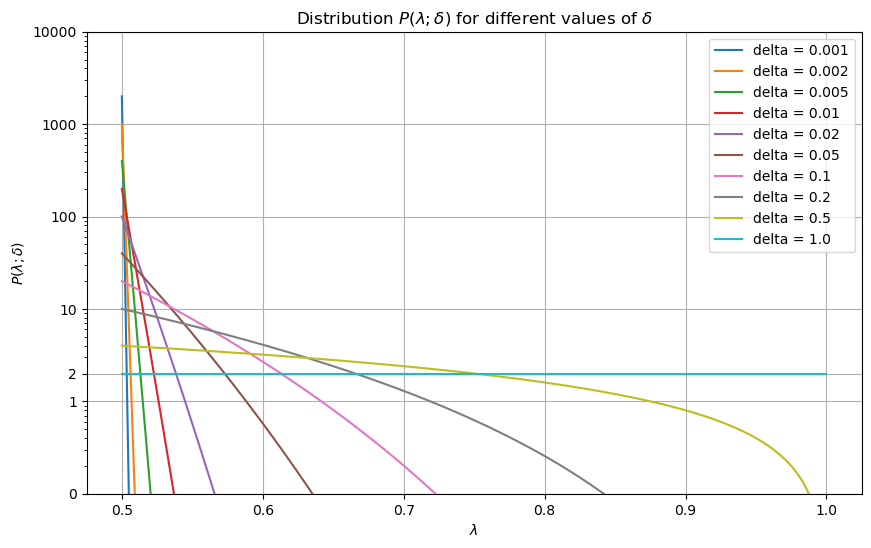

In [144]:
lambdas = np.linspace(0.5, 1, 500)
deltas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]

fig, ax = plt.subplots(figsize=(10, 6))

for delta in deltas:
    P_lambdas = P(lambdas, delta)
    ax.plot(lambdas, P_lambdas, label=f'delta = {delta}')


ax.set_title('Distribution $P(\lambda; \delta)$ for different values of $\\delta$')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$P(\lambda; \delta)$')
ax.legend()
ax.set_ylim([1e-1, 10000])
ax.set_yscale('log')
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_yticks([1e-1,1,2,10, 100, 1000, 10000])
ax.grid(True)

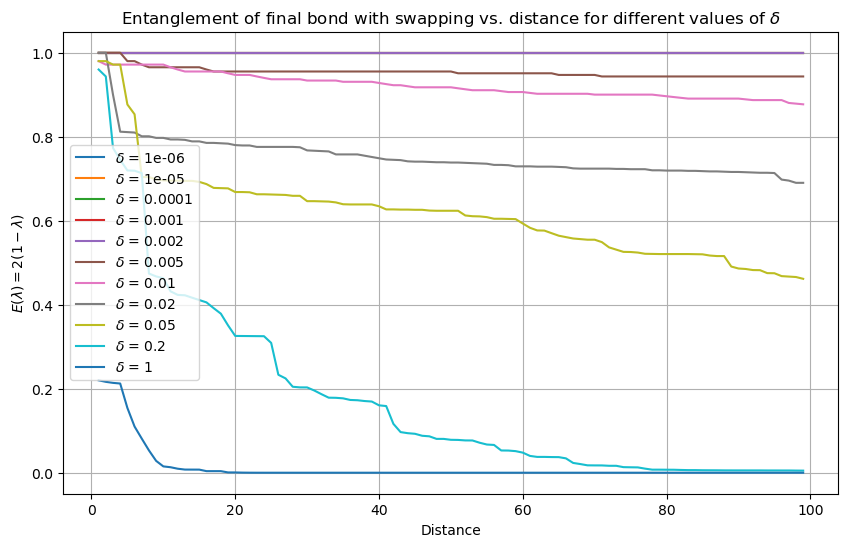

In [145]:
deltas = [1e-6, 1e-5, 1e-4, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.2, 1]
L = 100

plt.figure(figsize=(10, 6))

for delta in deltas:
    lambdas = []
    lambdas.append(gen_lambda(delta))

    for i in range(1, L-1):
        lambdas.append(lambda_swap(gen_lambda(delta), lambdas[-1]))
    
    plt.plot(np.arange(1, 100), 2*(1 - np.array(lambdas)), label=f'$\\delta$ = {delta}')


plt.xlabel('Distance')
plt.ylabel('$E(\lambda) = 2(1-\lambda)$')
plt.title('Entanglement of final bond with swapping vs. distance for different values of $\\delta$')
plt.grid(True)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'out_files/6/1/res_6_1.out'

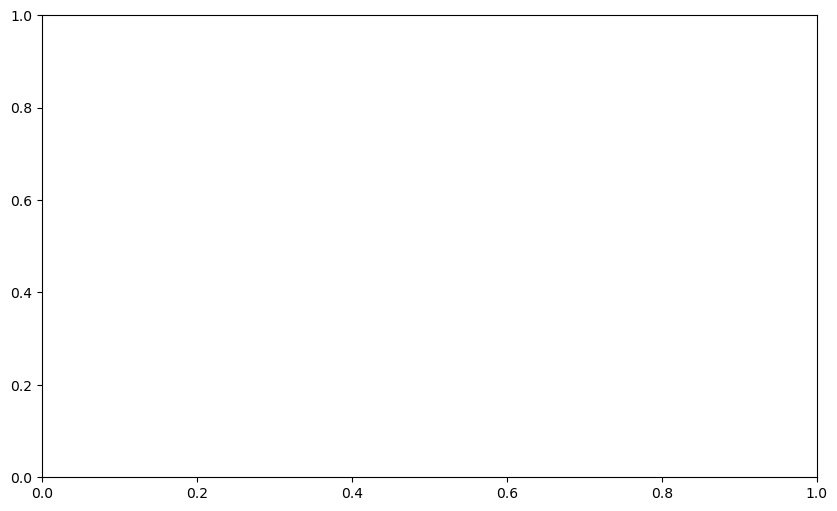

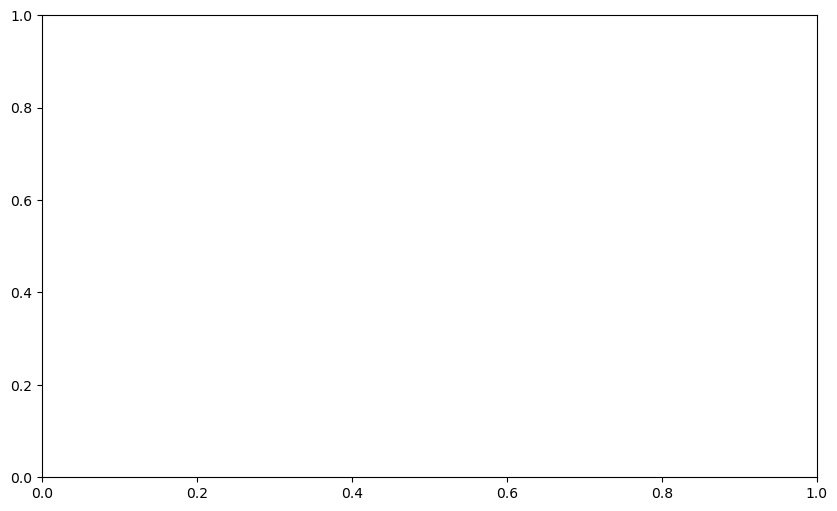

In [146]:
deltas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]

n = 6
n_samples = 16

f, ax1 = plt.subplots(figsize=(10, 6))
f, ax2 = plt.subplots(figsize=(10, 6))

# Create a dictionary to store colors for each label

Ls = np.arange(1, 2*(n-1)+1)

lambdas = {}
Ns = {}

# Iterate over the deltas and plot the data
for sample in range(n_samples):
    lambdas[sample+1] = {}
    Ns[sample+1] = {}

    colors = {}

    for (i, delta) in enumerate(deltas):
        lambdas[sample+1][delta] = []
        Ns[sample+1][delta] = []
        with open(f"out_files/{n}/{sample+1}/res_{n}_{i+1}.out", 'r') as file:
            for line in file:
                tokens = line.split()
                L, lambda_, N = map(float, tokens)

                lambdas[sample+1][delta].append(lambda_)
                Ns[sample+1][delta].append(N)

        label = f'$\\delta$ = {delta}'
        if delta not in colors:
            colors[label] = plt.cm.tab10(len(colors))  # Assign a new color if not already assigned

for sample in range(n_samples):
    for delta in deltas:
        ax1.plot(Ls, lambdas[sample+1][delta], 'x', color=colors[f'$\\delta$ = {delta}'])
        ax2.plot(Ls, Ns[sample+1][delta], 'x', color=colors[f'$\\delta$ = {delta}'])

for delta in deltas:
    lambda_mean = [np.mean([lambdas[s][delta][L-1] for s in range(1, n_samples+1)]) for L in Ls]
    ax1.plot(Ls, lambda_mean, color=colors[f'$\\delta$ = {delta}'])

    N_mean = [np.mean([Ns[s][delta][L-1] for s in range(1, n_samples+1)]) for L in Ls]
    ax2.plot(Ls, N_mean, color=colors[f'$\\delta$ = {delta}'])


# Add constant lines to the first subplot
# ax1.plot(Ls, [1 for _ in range(len(Ls))])
# ax1.plot(Ls, [0 for _ in range(len(Ls))])

# Add constant lines to the second subplot
# ax2.plot(np.arange(1, 2*(n-1)+1, 1), np.arange(1, 2*(n-1)+1, 1), 'g', label=r'$\mathcal{N}$ = D')
# ax2.plot(np.arange(1, 2*(n-1)+1, 1), 2*np.arange(1, 2*(n-1)+1, 1), 'orange', label=r'$\mathcal{N}$ = 2D')
# ax2.plot(np.arange(1, 2*(n-1)+1, 1), 3*np.arange(1, 2*(n-1)+1, 1), 'r', label=r'$\mathcal{N}$ = 3D')

ax2.fill_between(Ls, 1.5*np.arange(1, 2*(n-1)+1, 1), 3*np.arange(1, 2*(n-1)+1, 1), alpha=0.2, color='r')
ax2.fill_between(Ls, np.arange(1, 2*(n-1)+1, 1), 1.5*np.arange(1, 2*(n-1)+1, 1), alpha=0.2, color='g')

# Set labels and titles for the first subplot
ax1.set_xlabel('Distance')
ax1.set_ylabel('$E(\\lambda) = 2(1-\\lambda)$')
# ax1.set_yscale('log')
ax1.set_title('Entanglement of final bond vs. distance for different values of $\\delta$')
ax1.grid(True)

# Create custom legend for the first subplot
handles = [plt.Line2D([0], [0], color=color, label=label) for label, color in colors.items()]
ax1.legend(handles=handles)

# Set labels and titles for the second subplot
ax2.set_xlabel('Distance')
ax2.set_ylabel('$\\mathcal{N}$')
ax2.set_title('Number of destroyed links $\\mathcal{N}$ vs. distance for different values of $\\delta$')
ax2.grid(True)
ax2.legend(handles=handles)

plt.show()


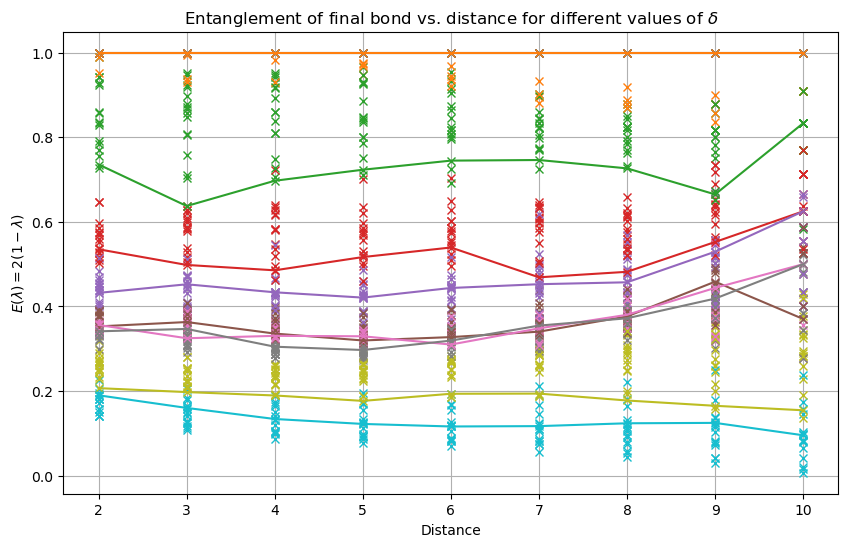

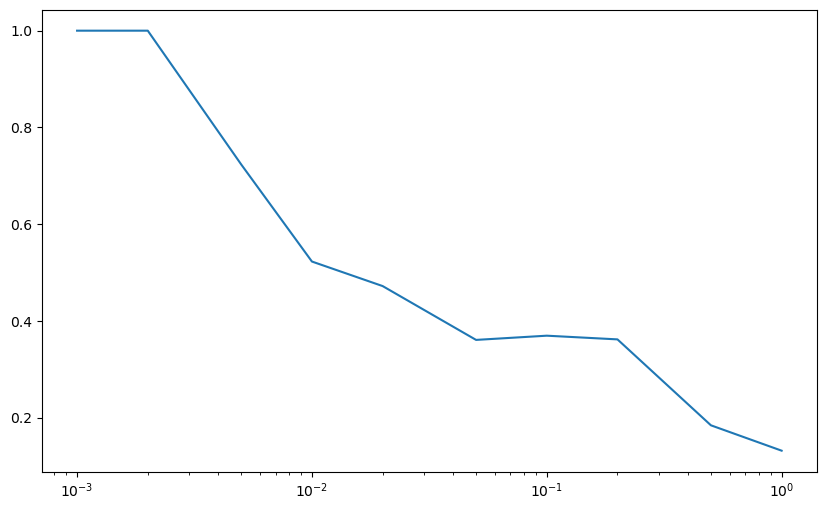

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig3, ax3 = plt.subplots(figsize=(10,6))

for sample in range(n_samples):
    for delta in deltas:
        ax.plot(Ls[1:], [lambdas[sample+1][delta][L-1]*L/(Ns[sample+1][delta][L-1]) for L in Ls[1:]], 'x', color=colors[f'$\\delta$ = {delta}'])

for delta in deltas:
    lambda_mean = [np.mean([lambdas[sample+1][delta][L-1]*L/(Ns[sample+1][delta][L-1]) for s in range(1, n_samples+1)]) for L in Ls[1:]]
    ax.plot(Ls[1:], lambda_mean, color=colors[f'$\\delta$ = {delta}'])

param = [np.mean([np.mean([lambdas[sample+1][delta][L-1]*L/(Ns[sample+1][delta][L-1]) for s in range(1, n_samples+1)]) for L in Ls[1:]]) for delta in deltas]
ax3.plot(deltas, param)

# Set labels and titles for the first subplot
ax.set_xlabel('Distance')
ax.set_ylabel('$E(\\lambda) = 2(1-\\lambda)$')
# ax1.set_yscale('log')
ax.set_title('Entanglement of final bond vs. distance for different values of $\\delta$')
ax.grid(True)
ax3.set_xscale('log')

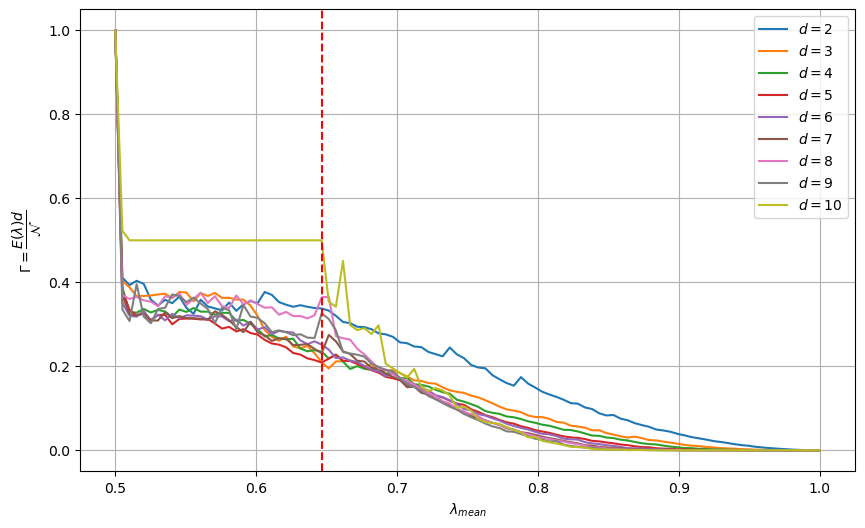

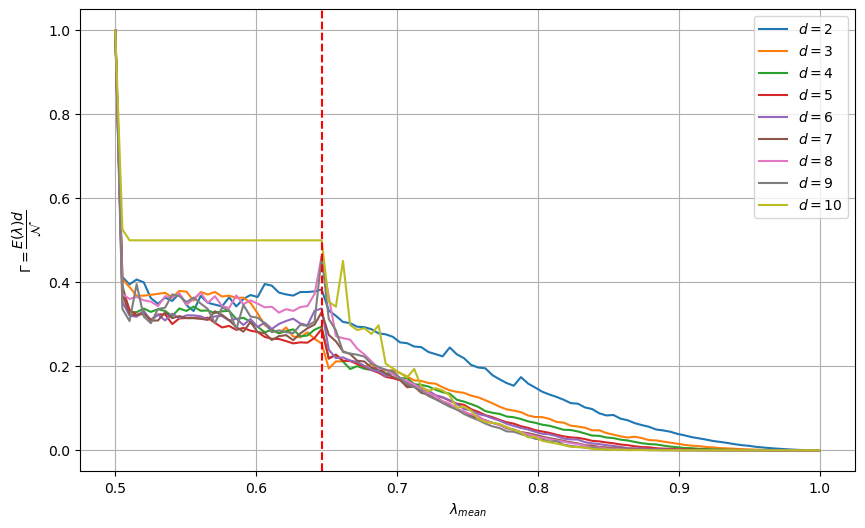

In [295]:
fig, ax = plt.subplots(figsize=(10,6))
fig2, ax2 = plt.subplots(figsize=(10,6))

lambdas = np.arange(0.5, 1.005, 1/198)

ents = {}
Ns = {}
Ls = []

n = 6
for (i, lambda_) in enumerate(lambdas):

    ents[lambda_] = []
    Ns[lambda_] = []

    with open(f"out_files/{n}/res_{n}_{i+1}.out", 'r') as file:
        for line in file:
            tokens = line.split()
            L, ent, N = map(float, tokens)

            if i == 1:
                Ls.append(int(L))

            ents[lambda_].append(ent)
            Ns[lambda_].append(N)

# ax.plot(lambdas, [np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas], label="mean")

for d in Ls[1:]:
    ax.plot(lambdas, np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas]), label='$d = {}$'.format(d))#, color='#1f77b4')

# ax2.plot(lambdas, np.concatenate([np.array([np.mean([d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[:30]]), np.array([np.mean([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for d in Ls[1:]]) for lambda_ in lambdas[30:]])]), label="mean")
for d in Ls[1:]:
    ax2.plot(lambdas, np.concatenate([np.array([d/Ns[lambda_][d-1] for lambda_ in lambdas[:30]]), np.array([ents[lambda_][d-1]*d/Ns[lambda_][d-1] for lambda_ in lambdas[30:]])]), label='$d = {}$'.format(d))#, color='#1f77b4')

#lambda_c = 0.5*(1+np.sqrt(1-np.sqrt(2*(np.sqrt(2)-1))))
lambda_c = lambdas[29]
ax.axvline(lambda_c, linestyle="dashed", color="red")

ax.set_xlabel(r'$\lambda_{mean}$')
ax.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax.grid(True)
ax.legend()

ax2.axvline(lambda_c, linestyle="dashed", color="red")
ax2.set_xlabel(r'$\lambda_{mean}$')
ax2.set_ylabel('$\\Gamma = \dfrac{E(\\lambda)d}{\mathcal{N}}$')
# ax.set_yscale('log')
ax2.grid(True)
ax2.legend()